# Swarm Algorithm for Objects Moving in 2D Domain
The swarm concept in recents years gained quite popularity in many applications, especially in defence industry. The most attracting side of swarm concept is to be able to fulfill complex duties with relatively cheap ammo.

The code below shows swarming particles (like drones) in 2 Dimensional domain and has been generated with rule based algorithm given in the great paper "Outdoor flocking and formation flight with autonomous aerial robots" by Vicsek et. al. [1] The document referenced in [2] is also a very explanatory and beneficial to understand the basics of swarm concept.

The first thing to do is to import necessary packages to our environment. 

# Refences
[1] "Outdoor flocking and formation flight with autonomous aerial robots", G. Vásárhelyi, Cs. Virágh, G. Somorjai, N. Tarcai, T. Szörényi, T. Nepusz, T. Vicsek

[2] "Dynamic Mission Control for UAV Swarm via Task Stimulus Approach", Haoyang Cheng , John Page, John Olsen

[3] https://github.com/ibrahimkaya754/GeneticAlgorithm

In [1]:
# Import neccessary modules
import time
import math
import matplotlib.pyplot as plt
import pygame
import random
import numpy as np
from pygame.locals import *
from PygameModule import *
from Swarm_Algorithm_RuleBased import *

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


What is next is, we are deciding the values of some simulation parameters, like the time step size, number of particles swarming, total run time, etc.

In [21]:
# Simulation Parameters
number_of_particles = 51
number_of_axes      = 2
delta_t             = 0.1
t_final             = 1000
wght_leader         = np.array((0.0,0.0,0.0,0.0,10.0,0.0))

# Main Parameters
The parameters given below inside the main function has been obtained by Genetic Algorithm (GA). The writers of the paper did not give the values of the parameters, which is quite reasonable to some point, since every application has its own dynamics, i.e., the parameters from one applicastion to the other will probably be very different. For my application, I used GA code I have shared in my github repo [3] and the algorithm has given the parameters seen inside the main function.

There are 2 important modules imported to our environment above. One of them is PygameModule which generates the neccessary things for visualization of the particles moving with swarm condition. The other one is the Swarm_Algoritm_RuleBased, where the rulebased algorithm given in the paper is coded.

What is happenning in the simulation can be summarized as the following:

* There are 51 particles swarming in the domain

* One of them is the leader that every information about the mission is known by

* The other 50 particles does not know anything about the mission but the only thing they know is they should follow the leader without creating any crash inside the population

* The points of the target that is to be followed were given in the list of waypoints, where it can be changed inside the domain randomly.

* The parameters obtained by GA has been generated for a fitness function minimizing the sum of the distances between the group members (minimization of the dispersion), while preventing the individual particles from approaching to eachother greater than a value defined (8 meters given in our case).

* Although the number of total particles (population) has been given as 51, it can be increased (to 100s) or decreased (to around 10) since the algorithm coded can be applied for any number of particles, i.e., the algorithm given here is scalable.

In [22]:
# main function
def main(paramaters=[19.087,77.570,74.741,49.385,50.461,31.121,715.096,
                     87.658,-8.527,9.441,-1.126,7.908,5.326,-3.060],TimeConstant=0.1):
    wght_fllwr               = np.array((paramaters[8],paramaters[9],paramaters[10],
                                         paramaters[11],paramaters[12],paramaters[13]),dtype='double')
    distances                = np.zeros((number_of_particles,number_of_particles*number_of_axes))
    distances_abs            = np.zeros((number_of_particles,number_of_particles))
    closest_distances_abs    = np.zeros((number_of_particles,number_of_particles))
    closest_particles_abs    = np.zeros((number_of_particles,number_of_particles),dtype='int32')
    closestneighbours        = np.zeros((number_of_particles),dtype='int16')
    position                 = np.zeros((number_of_particles,number_of_axes)) 
    velocity                 = np.zeros((number_of_particles,number_of_axes)) 
    position_delta           = np.zeros((number_of_particles,number_of_axes))
    dist_twp                 = np.zeros((number_of_particles-1,1))

    screen_size = [3000, 1300]
    screen = pygame.display.set_mode(tuple(screen_size))
    pygame.display.set_caption("Swarm")
    
#     xtrg              = [2200.0,650.0] + np.round(np.multiply(np.subtract(screen_size,[2700,1200]),[np.random.random()]))
    xtrg              = [2400,200]
    list_min_distance = []
    list_ave_distance = []
            
    background = pygame.Surface(screen.get_size())
    background.fill((255, 255, 255))
    screen.blit(background, (0, 0))
    
    particles = np.zeros((number_of_particles),dtype = particle)
    for ii in range(number_of_particles-2):
        particles[ii]  = particle(screen, background, color =0)
        position[ii,0] = particles[ii].positionx
        position[ii,1] = particles[ii].positiony
        velocity[ii,0] = particles[ii].velx
        velocity[ii,1] = particles[ii].vely
    for ii in range(number_of_particles-2,number_of_particles-1):
        particles[ii]  = particle(screen, background, color =1)
        position[ii,0] = particles[ii].positionx
        position[ii,1] = particles[ii].positiony
        velocity[ii,0] = particles[ii].velx
        velocity[ii,1] = particles[ii].vely
    for ii in range(number_of_particles-1,number_of_particles):
        particles[ii]  = particle(screen, background, color =2)
        particles[ii].positionx = xtrg[0]
        particles[ii].positiony = xtrg[1]
        position[ii,0] = particles[ii].positionx
        position[ii,1] = particles[ii].positiony
        velocity[ii,0] = particles[ii].velx
        velocity[ii,1] = particles[ii].vely
    
    dist = distance(population_number=number_of_particles,dimension=number_of_axes,
                    distances=distances,distances_abs=distances_abs,
                    position=position,
                    closest_distances_abs=closest_distances_abs,closest_particles_abs=closest_particles_abs,
                    closestneighbours=closestneighbours)
    
    distances,distances_abs,closest_distances_abs,closest_particles_abs,closestneighbours = dist.find_distances()
    swarm_algo_follower = swarm_algorithm(params=paramaters)
    swarm_algo_leader   = swarm_algorithm(params=paramaters)
    
    allSprites = pygame.sprite.Group(particles[:]) # Grouping the objects to use the uniform method
    clock = pygame.time.Clock()
    time1 = time.process_time()
    keepGoing = True
    iter      = 0
    t         = 0
    counter   = 0

    while keepGoing:
        try:
            xtrg      = np.add(xtrg,np.multiply([4,4],0.01))
            remainder = iter % 100        
            for ii in range(number_of_particles-2):
                dist_to_ldr = dist.dist_to_wypnt(position[ii],position[number_of_particles-2])
                for jj in range(number_of_axes):
                    swarm_algo_follower.algo(particle=ii,axes=jj,position=position,velocity=velocity,
                                             closest_particles_abs=closest_particles_abs,
                                             xtrg=position[number_of_particles-2],TimeConstant=TimeConstant,
                                             wght=wght_fllwr,distance_to_target=dist_to_ldr)
                    position_delta[ii,jj] = swarm_algo_follower.position_delta
                    velocity[ii,jj]       = swarm_algo_follower.velocity[ii,jj]
                
                particles[ii].dx = position_delta[ii,0]
                particles[ii].dy = position_delta[ii,1]
                
                particles[ii].update()
                position[ii,0] = particles[ii].positionx
                position[ii,1] = particles[ii].positiony                    
            
            for ii in range(number_of_particles-2,number_of_particles-1):
                dist_to_trg = dist.dist_to_wypnt(position[ii],xtrg)
                for jj in range(number_of_axes): 
                    swarm_algo_leader.algo(particle=ii,axes=jj,position=position,velocity=velocity,
                                           closest_particles_abs=closest_particles_abs,TimeConstant=TimeConstant, 
                                           xtrg=xtrg,wght=wght_leader,distance_to_target=dist_to_trg)
                    
                    position_delta[ii,jj] = swarm_algo_leader.position_delta  
                    velocity[ii,jj]       = swarm_algo_leader.velocity[ii,jj]
    
                particles[ii].dx = position_delta[ii,0]
                particles[ii].dy = position_delta[ii,1]
                particles[ii].update()
                position[ii,0] = particles[ii].positionx
                position[ii,1] = particles[ii].positiony       
                              
            particles[number_of_particles-1].dx          = 0
            particles[number_of_particles-1].dy          = 0
            particles[number_of_particles-1].update()
            particles[number_of_particles-1].positionx   = xtrg[0]
            particles[number_of_particles-1].positiony   = xtrg[1]                
            particles[number_of_particles-1].rect.center = (particles[number_of_particles-1].positionx, 
                                                            particles[number_of_particles-1].positiony)
            
            position[number_of_particles-1,0]            = particles[number_of_particles-1].positionx
            position[number_of_particles-1,1]            = particles[number_of_particles-1].positiony
            
            distances,distances_abs,closest_distances_abs, \
            closest_particles_abs,closestneighbours = dist.find_distances()
            dist_to_trg = dist.dist_to_wypnt(position[number_of_particles-2],xtrg)
            
            iter = iter + 1
            t    = t + delta_t
            counter = counter + 1
            list_min_distance.append(np.min(closest_distances_abs[0:98,1]))
            list_ave_distance.append(np.average(closest_distances_abs[0:98,1:100]))
            
            if dist_to_trg <= 5.0:
                if np.random.rand() >= 0.98:
                    xtrg      = [50.0,50.0] + \
                                np.round(np.multiply(np.subtract(screen_size,[100,100]),[np.random.random()]))
            
            if t >= t_final:
                keepGoing = False
            
            if remainder == 0:
                print('time = ',t,' s ', ' target_pos = ', xtrg)
                print('average_min_distance = ', np.average(list_min_distance))
                print('average_group_distance = ', np.average(list_ave_distance))
                print('\n')
                counter = 0
#################################################################################################################################
            allSprites.clear(screen, background)
            allSprites.draw(screen)\

            pygame.display.flip()
        except:
            print('unexpected error --- sorry')
            keepGoing = False
            
    pygame.quit()
    time2 = time.process_time()
    delta_time = time2 - time1
    return position,velocity,distances,closestneighbours,delta_time, \
           closest_particles_abs, closest_distances_abs, list_min_distance, list_ave_distance

Below is the cell where the above code is run. 

Although I have run the code for a simulation time of 100 seconds, one can run it as long as he likes.

In [61]:
# run
if __name__ == "__main__":
    position,velocity,distances,closestneighbours,delta_time, \
    closest_particles_abs,closest_distances_abs, list_min_distance, list_ave_distance = main(TimeConstant=0.50)

time =  0.1  s   target_pos =  [2400.04  200.04]
average_min_distance =  14.466907131032833
average_group_distance =  403.22615012021066


time =  10.09999999999998  s   target_pos =  [2404.04  204.04]
average_min_distance =  15.939822664654637
average_group_distance =  403.0199207930636


time =  20.100000000000016  s   target_pos =  [2408.04  208.04]
average_min_distance =  16.813981277130434
average_group_distance =  402.62658589790755


time =  30.100000000000158  s   target_pos =  [2412.04  212.04]
average_min_distance =  16.91042200566627
average_group_distance =  402.1886061407359


time =  40.1000000000003  s   target_pos =  [2416.04  216.04]
average_min_distance =  16.839405518051095
average_group_distance =  401.7585950380126


time =  50.10000000000044  s   target_pos =  [2420.04  220.04]
average_min_distance =  17.02024318104314
average_group_distance =  401.3453090333626


time =  60.100000000000584  s   target_pos =  [2424.04  224.04]
average_min_distance =  16.8842407600

time =  540.1000000000543  s   target_pos =  [2616.04  416.04]
average_min_distance =  15.826833598651223
average_group_distance =  375.49276129438306


time =  550.1000000000565  s   target_pos =  [2620.04  420.04]
average_min_distance =  15.845345900276994
average_group_distance =  374.7747635153049


time =  560.1000000000588  s   target_pos =  [2624.04  424.04]
average_min_distance =  15.863853037598489
average_group_distance =  374.053499262481


time =  570.1000000000611  s   target_pos =  [2628.04  428.04]
average_min_distance =  15.883422839944112
average_group_distance =  373.3284840288831


time =  580.1000000000633  s   target_pos =  [2632.04  432.04]
average_min_distance =  15.90509373789275
average_group_distance =  372.59645281618697


time =  590.1000000000656  s   target_pos =  [2636.04  436.04]
average_min_distance =  15.891880859225761
average_group_distance =  371.85470950993107


time =  600.1000000000679  s   target_pos =  [2640.04  440.04]
average_min_distance =  

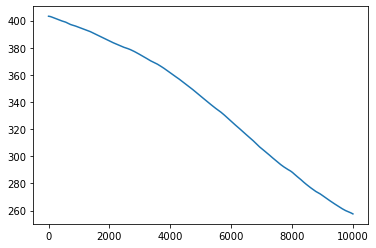

In [62]:
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance)

In [63]:
list_ave_distance_kinetic_50 = list_ave_distance

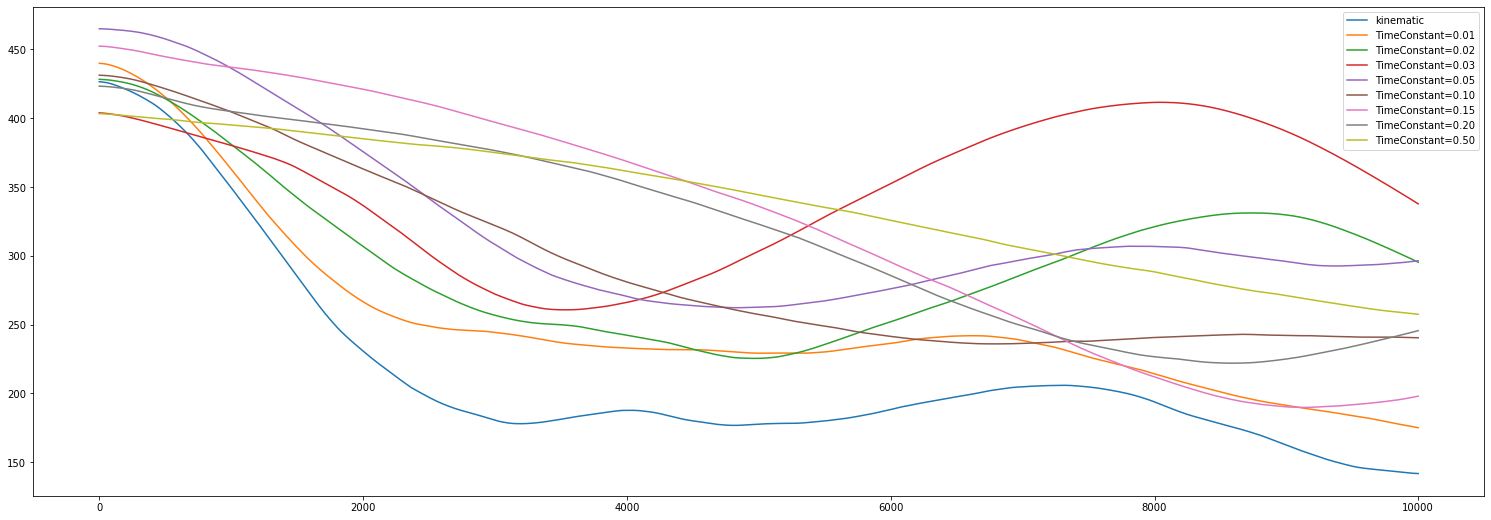

In [64]:
plt.figure(figsize=(26,9))
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance_kinematic,label='kinematic')
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance_kinetic_01,label='TimeConstant=0.01')
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance_kinetic_02,label='TimeConstant=0.02')
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance_kinetic_03,label='TimeConstant=0.03')
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance_kinetic_05,label='TimeConstant=0.05')
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance_kinetic_10,label='TimeConstant=0.10')
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance_kinetic_15,label='TimeConstant=0.15')
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance_kinetic_20,label='TimeConstant=0.20')
plt.plot(np.arange(len(list_ave_distance)),list_ave_distance_kinetic_50,label='TimeConstant=0.50')
plt.legend()
plt.show()